In [ ]:
import sys
import numpy as np

parent_dir = '/Users/simonschaefer/Documents/bf_dmc'

functions_dir = parent_dir + '/functions'

sys.path.append(functions_dir)

from dmc_modules import DMC



In [6]:
# ['A', 'tau', 'mu_c', 'mu_r', 'b']
dmc_oof = DMC(prior_means = np.array([16.37, 111.28, 0.53, 322.82, 74.96]),
               prior_sds = np.array([10.42, 47.41, 0.13,39.86, 22.64]))

dmc_acdc = DMC(prior_means = np.array([20.61, 112.93, 0.42, 362.36, 102.08]),
               prior_sds = np.array([10.77, 34.97, 0.14, 60.77, 33.11]))

dmc_winsim = DMC(prior_means = np.array([70.80, 114.71, 0.71, 332.34, 98.36]),
               prior_sds = np.array([19.42, 40.08, 0.14, 52.07, 30.05]))

models = [dmc_oof, dmc_acdc, dmc_winsim]

In [28]:
test_data = dmc_oof.experiment(params = dmc_oof.prior())


import pandas as pd


narrow_data = pd.read_csv(parent_dir + '/data/model_data/experiment_data_narrow.csv')
wide_data = pd.read_csv(parent_dir + '/data/model_data/experiment_data_wide.csv')

empirical_data = pd.concat([narrow_data, wide_data])

empirical_accuracies = empirical_data.groupby('participant').mean('accuracy')

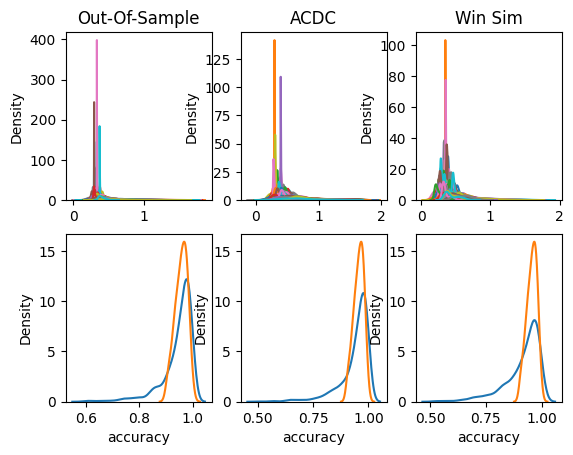

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


n_sims = 1000

fig, axes = plt.subplots(2,3)

nodel_titles = ['Out-Of-Sample', 'ACDC', 'Win Sim']

for j, model in enumerate(models):

    lst_acc_means = list()

    for i in range(0, n_sims):
        acc_sim_iteration = model.experiment(params = model.prior())
        lst_acc_means.append(np.mean(acc_sim_iteration['acc']))

        sns.kdeplot(acc_sim_iteration['rt'], ax=axes[0,j])
        axes[0,j].set_title(nodel_titles[j])
    
    sns.kdeplot(np.array(lst_acc_means), ax =axes[1, j])
    sns.kdeplot(empirical_accuracies['accuracy'], ax =  axes[1, j], label = 'Empirical')
    # sns.kdeplot(empirical_accuracies['rt'], ax =  axes[0, j], label = 'Empirical')


# lst_acc_means

In [13]:
import pandas as pd


narrow_data = pd.read_csv(parent_dir + '/data/model_data/experiment_data_narrow.csv')
wide_data = pd.read_csv(parent_dir + '/data/model_data/experiment_data_wide.csv')

empirical_data = pd.concat([narrow_data, wide_data])

empirical_accuracies = empirical_data.groupby('participant').mean('accuracy')

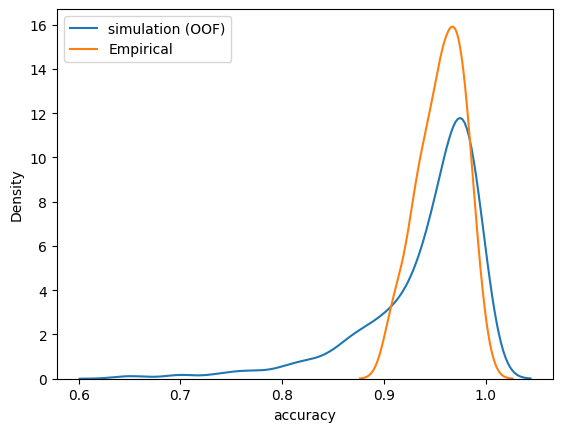

In [14]:
import matplotlib.pyplot as plt

sns.kdeplot(lst_acc_means, label = 'simulation (OOF)')
sns.kdeplot(empirical_accuracies['accuracy'], label = 'Empirical')
plt.legend()